In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', None)    # Display all rows
pd.set_option('display.max_columns', None) # Display all columns
pd.set_option('display.expand_frame_repr', False) # Prevent wrapping of columns

In [3]:
xlsx_file_path = '/content/Test sample.xlsx'
csv_file_path = '/content/converted_file.csv'

In [4]:
df = pd.read_excel(xlsx_file_path, engine='openpyxl')
df.to_csv(csv_file_path, index=False)

In [5]:
df.head(10)

,rep_date,tsag_CreatedOnTime,TSAction,sales_channel,traf_cat_big,traf_cat_small,traf_cat_type,page_reached_CRM,up_stage,mid_stage,page_status,rejection_group,sub_stage,is_completed,is_success,is_approved,is_verificated,funnel_component
0,2022-05-17,2022-05-17 09:11:06.358,20,Mobile,Organic,Google Play,Free,Application Summary,Application Summary,Left on Application Summary,Left page,Not rejected,z\ no data,1,1,1,1,1-TR
1,2022-05-17,2022-05-17 15:10:07.375,17,Mobile,Contextual,Google Play,Paid,NaN,e-Sign,Disbursed,Completed page,Not rejected,Disbursed,1,1,1,1,Disbursed
2,2022-05-17,2022-05-17 19:08:06.054,7,Mobile,Affiliate,Cashtap_int,Paid,Bank Verification,NaN,NaN,NaN,Rejected,Exists Active Bank Account,0,0,0,0,1-CR
3,2022-05-17,2022-05-17 12:52:24.080,7,Mobile,Organic,Vivo store,Free,Bank Verification,Bank Verification,Rejected on Call 1,Left page,Rejected,Active moratorium,1,0,0,0,1-AR
4,2022-05-17,2022-05-17 23:00:35.315,3,Mobile,Affiliate,HiCredit,Paid,KYC Details,KYC Details,Left on KYC Details,Left page,Not rejected,z\ no data,0,0,0,0,1-CR
5,2022-05-17,2022-05-17 16:05:39.610,3,Mobile,Organic,Google Play,Free,KYC Details,KYC Details,Left on KYC Details,Left page,Not rejected,z\ no data,0,0,0,0,1-CR
6,2022-05-17,2022-05-17 18:43:48.429,7,Mobile,Organic,Google Play,Free,Bank Verification,KYC Details,Rejected on CRM deduplication,Completed page,Rejected,Rejected. Partial data match (ID/Moblie) with ...,1,0,0,0,1-AR
7,2022-05-17,2022-05-17 09:08:24.442,3,Mobile,Affiliate,Cashtap_int,Paid,KYC Details,KYC Details,Left on KYC Details,Left page,Not rejected,z\ no data,0,0,0,0,1-CR
8,2022-05-17,2022-05-17 11:54:25.608,7,Mobile,Organic,Google Play,Free,Bank Verification,Bank Verification,Rejected on Call 3,Left page,Rejected,Scoring Model Reject,1,1,0,0,1-AR
9,2022-05-17,2022-05-17 09:07:06.873,3,Mobile,Affiliate,ValueLeaf,Paid,KYC Details,KYC Details,Left on KYC Details,Left page,Not rejected,z\ no data,0,0,0,0,1-CR


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121583 entries, 0 to 121582
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   rep_date            121583 non-null  datetime64[ns]
 1   tsag_CreatedOnTime  121583 non-null  datetime64[ns]
 2   TSAction            121583 non-null  int64         
 3   sales_channel       121583 non-null  object        
 4   traf_cat_big        121583 non-null  object        
 5   traf_cat_small      121583 non-null  object        
 6   traf_cat_type       121583 non-null  object        
 7   page_reached_CRM    117493 non-null  object        
 8   up_stage            121425 non-null  object        
 9   mid_stage           121425 non-null  object        
 10  page_status         121425 non-null  object        
 11  rejection_group     121583 non-null  object        
 12  sub_stage           121583 non-null  object        
 13  is_completed        121583 no

In [7]:
inspect = ["sales_channel", "traf_cat_big", "traf_cat_small", "traf_cat_type", "page_reached_CRM", "up_stage", "mid_stage", "page_status", "rejection_group", "sub_stage", "funnel_component"]



In [8]:
for column in inspect:
    print(f"Column: {column}")
    print(df[column].value_counts())

Column: sales_channel
sales_channel
Mobile    121583
Name: count, dtype: int64
Column: traf_cat_big
traf_cat_big
Organic          60809
Affiliate        54729
Contextual        5103
z\ no info         526
Communication      407
Social Paid          9
Name: count, dtype: int64
Column: traf_cat_small
traf_cat_small
Google Play          58898
ValueLeaf            18985
BuddyLoan            15694
Vivo store            6063
Veve                  5696
Whistle               4120
Cashtap_int           3673
inmobi                1270
HiCredit              1263
Organic                902
link2u_int             781
z\ no info             526
minoads_int            469
digitalcashwala        437
bigfished_int          361
adsplay                343
GGSM                   328
RCS                    248
globalemedia           242
HexaWebony             135
cronbay_int            116
sms                    110
Social Donut           100
MobAvenue               97
mobiyoung               92
Admatic   

In [9]:
total_applications = df.shape[0]
completed_applications = df[df['is_completed'] == 1].shape[0]
conversion_rate = (completed_applications / total_applications) * 100

In [10]:
print(conversion_rate)
print(total_applications)
print(completed_applications)

59.986182278772525
121583
72933


In [13]:
for column in inspect:
    conversion_by_arg = df.groupby(column)["is_completed"].mean() * 100
    conversion_by_arg = conversion_by_arg.sort_values(ascending=True)
    print(f"Conversion rates by {column}:\n{conversion_by_arg}\n")

Conversion rates by sales_channel:
sales_channel
Mobile    59.986182
Name: is_completed, dtype: float64

Conversion rates by traf_cat_big:
traf_cat_big
Contextual       47.560259
Affiliate        50.192768
z\ no info       50.760456
Social Paid      66.666667
Organic          69.828479
Communication    73.955774
Name: is_completed, dtype: float64

Conversion rates by traf_cat_small:
traf_cat_small
adyogisventure         0.000000
adsouch                0.000000
Tarsan                 0.000000
eriblabs_int           0.000000
Optimedia              0.000000
ruitomedia_int         0.000000
mobiyoung              3.260870
Prodigital_int         9.090909
link2u_int            17.541613
PruDigital            22.222222
affinityveve          25.000000
veve                  26.315789
digitalcashwala       31.578947
lilac_int             32.142857
biggermobil_int       32.258065
inmobi                37.874016
Cashtap_int           39.640621
Admatic               46.067416
Veve                  4

In [14]:
for column in inspect:
  conversions_by_column = df.groupby(column)["is_completed"].sum()
  print(conversions_by_column)


sales_channel
Mobile    72933
Name: is_completed, dtype: int64
traf_cat_big
Affiliate        27470
Communication      301
Contextual        2427
Organic          42462
Social Paid          6
z\ no info         267
Name: is_completed, dtype: int64
traf_cat_small
19mobi_int              45
Admatic                 41
Advolt agency           17
Apex Media               3
BuddyLoan             8552
Cashtap_int           1456
Click2Agency             2
FaceBook                 6
GGSM                   189
Google Play          41120
HexaWebony              80
HiCredit               682
Itworks_int              4
MRND                     1
MobAvenue               55
Optimedia                0
Organic                438
Prodigital_int           1
PruDigital               2
RCS                    175
Redmedia                14
Samsung store           34
Social Donut            57
Tarsan                   0
ValueLeaf             9849
Veve                  2646
Vivo store            3296
Whistle  

In [18]:
for column in inspect:
    conversions_by_column = df.groupby(column)["is_completed"].sum()
    total_conversions_for_column = conversions_by_column.sum()
    conversion_rate_by_col = (total_conversions_for_column / df["is_completed"].sum()) * 100

    print(f"Parameter {column} has {total_conversions_for_column} overall conversions and its rate is {conversion_rate_by_col:.2f}%")

Parameter sales_channel has 72933 overall conversions and its rate is 100.00%
Parameter traf_cat_big has 72933 overall conversions and its rate is 100.00%
Parameter traf_cat_small has 72933 overall conversions and its rate is 100.00%
Parameter traf_cat_type has 72933 overall conversions and its rate is 100.00%
Parameter page_reached_CRM has 68843 overall conversions and its rate is 94.39%
Parameter up_stage has 72933 overall conversions and its rate is 100.00%
Parameter mid_stage has 72933 overall conversions and its rate is 100.00%
Parameter page_status has 72933 overall conversions and its rate is 100.00%
Parameter rejection_group has 72933 overall conversions and its rate is 100.00%
Parameter sub_stage has 72933 overall conversions and its rate is 100.00%
Parameter funnel_component has 72933 overall conversions and its rate is 100.00%


In [23]:
df.head()

,rep_date,tsag_CreatedOnTime,TSAction,sales_channel,traf_cat_big,traf_cat_small,traf_cat_type,page_reached_CRM,up_stage,mid_stage,page_status,rejection_group,sub_stage,is_completed,is_success,is_approved,is_verificated,funnel_component
0,2022-05-17,2022-05-17 09:11:06.358,20,Mobile,Organic,Google Play,Free,Application Summary,Application Summary,Left on Application Summary,Left page,Not rejected,z\ no data,1,1,1,1,1-TR
1,2022-05-17,2022-05-17 15:10:07.375,17,Mobile,Contextual,Google Play,Paid,NaN,e-Sign,Disbursed,Completed page,Not rejected,Disbursed,1,1,1,1,Disbursed
2,2022-05-17,2022-05-17 19:08:06.054,7,Mobile,Affiliate,Cashtap_int,Paid,Bank Verification,NaN,NaN,NaN,Rejected,Exists Active Bank Account,0,0,0,0,1-CR
3,2022-05-17,2022-05-17 12:52:24.080,7,Mobile,Organic,Vivo store,Free,Bank Verification,Bank Verification,Rejected on Call 1,Left page,Rejected,Active moratorium,1,0,0,0,1-AR
4,2022-05-17,2022-05-17 23:00:35.315,3,Mobile,Affiliate,HiCredit,Paid,KYC Details,KYC Details,Left on KYC Details,Left page,Not rejected,z\ no data,0,0,0,0,1-CR


In [19]:
conversion_rate_over_time = (
    df.groupby("rep_date")["is_completed"].mean() * 100
)

In [24]:
conversion_rate_by_column = {}
for column in inspect:
    conversions_by_column = df.groupby(column)["is_completed"].sum()
    total_conversions_for_column = conversions_by_column.sum()
    overall_conversion = (total_conversions_for_column / df["is_completed"].sum()) * 100
    conversion_rate_by_column[column] = overall_conversion

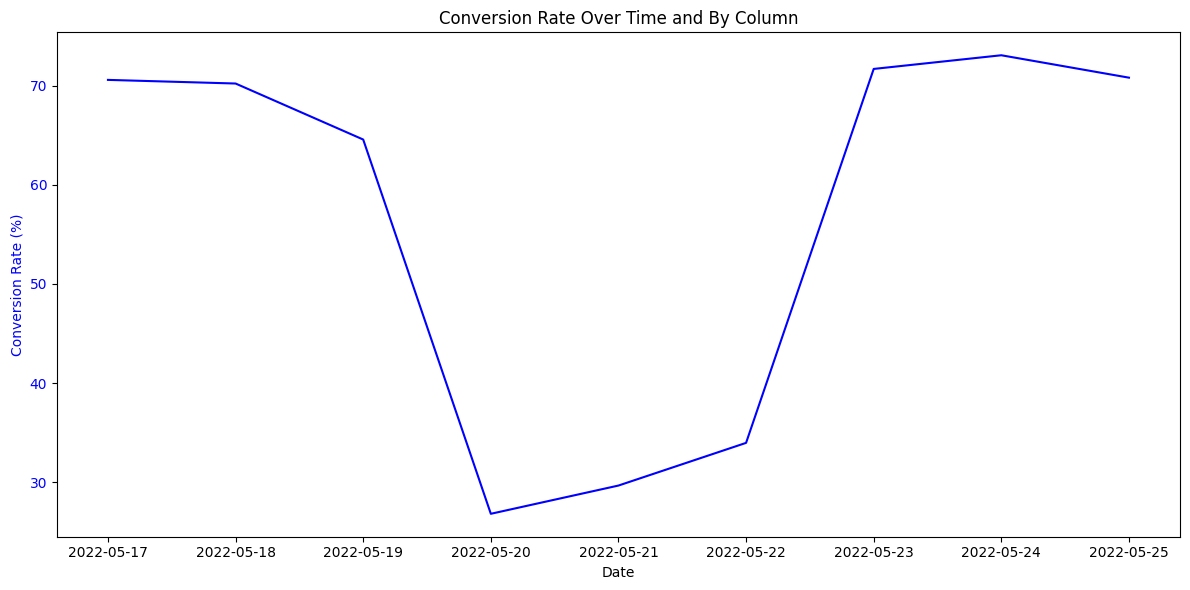

In [27]:
conversion_rate_over_time = (
    df.groupby("rep_date")["is_completed"].mean() * 100
)


conversion_rate_by_column = {}
for column in inspect:
    conversions_by_column = df.groupby(column)["is_completed"].sum()
    total_conversions_for_column = conversions_by_column.sum()
    overall_conversion = (total_conversions_for_column / df["is_completed"].sum()) * 100
    conversion_rate_by_column[column] = overall_conversion


column_names = list(conversion_rate_by_column.keys())
column_rates = list(conversion_rate_by_column.values())


fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(conversion_rate_over_time.index, conversion_rate_over_time.values, label="Conversion Rate Over Time", color='blue')
ax1.set_xlabel("Date")
ax1.set_ylabel("Conversion Rate (%)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')



plt.title("Conversion Rate Over Time and By Column")
fig.tight_layout()
plt.show()

In [30]:
from IPython.display import display

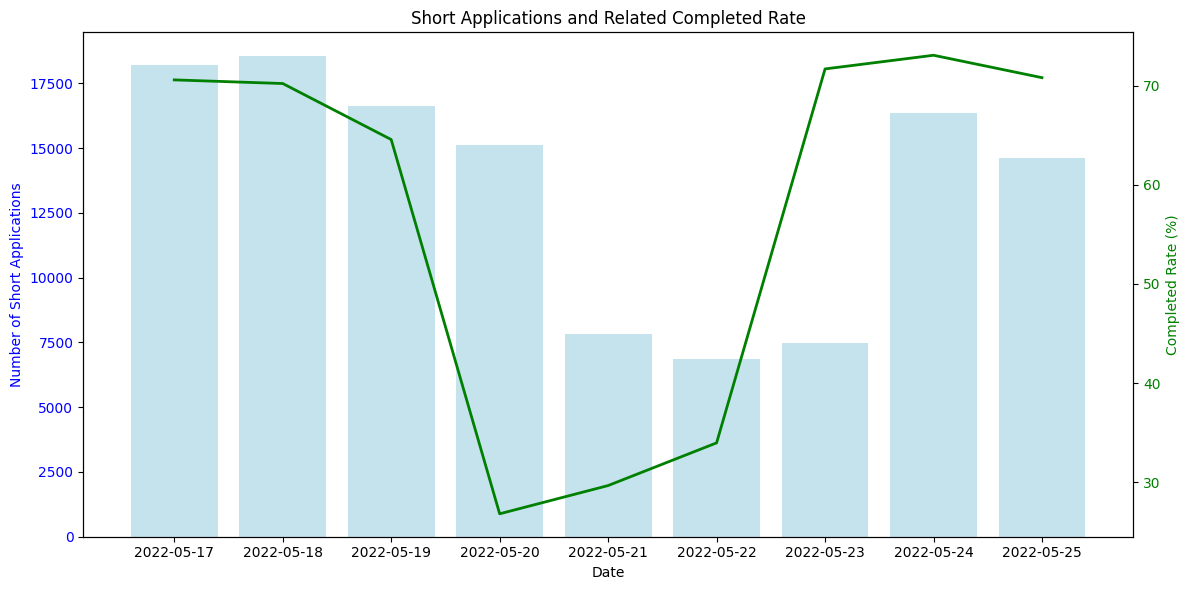

In [36]:
# 1. Number of short applications in the period with related completed rate
short_applications = df.groupby("rep_date").size()  # Total short applications by date
completed_applications = df[df["is_completed"] == 1].groupby("rep_date").size()  # Completed applications by date
completed_rate = (completed_applications / short_applications) * 100  # Completed rate by date

# Create a plot for short applications and related completed rate
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for the number of short applications
ax1.bar(short_applications.index, short_applications.values, label="Short Applications", color='lightblue', alpha=0.7)
ax1.set_xlabel("Date")
ax1.set_ylabel("Number of Short Applications", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Line plot for the completed rate
ax2 = ax1.twinx()
ax2.plot(completed_rate.index, completed_rate.values, label="Completed Rate", color='green', linewidth=2)
ax2.set_ylabel("Completed Rate (%)", color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Title and legends
plt.title("Short Applications and Related Completed Rate")
fig.tight_layout()
plt.show()





In [37]:
matrix_table = (
    df.groupby(["up_stage", "mid_stage", "page_status", "sub_stage"])
    .size()
    .reset_index(name="Number of Short Applications")
    .sort_values(by="Number of Short Applications", ascending=False)
)

In [38]:

print(matrix_table)

matrix_table.to_csv("matrix_table.csv", index=False)
print("Matrix table saved as 'matrix_table.csv'")

               up_stage                      mid_stage     page_status                                          sub_stage  Number of Short Applications
40     Personal Details       Left on Personal Details       Left page                                         z\ no data                         26952
35          KYC Details            Left on KYC Details       Left page                                         z\ no data                         21540
34    Bank Verification             Rejected on Call 3       Left page                               Scoring Model Reject                         18459
33    Bank Verification             Rejected on Call 3       Left page           Rejection due to unsecure overdue amount                          6895
38          KYC Details  Rejected on CRM deduplication  Completed page  Rejected. Partial data match (ID/Moblie) with ...                          6825
31    Bank Verification             Rejected on Call 3       Left page        Rejection 